# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`.
    - Obliczanie kwadratów: `np.square`.
    - Obliczanie pierwiastka: `np.sqrt`.
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["lenaRGB.png", "lenaRGBSzum.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

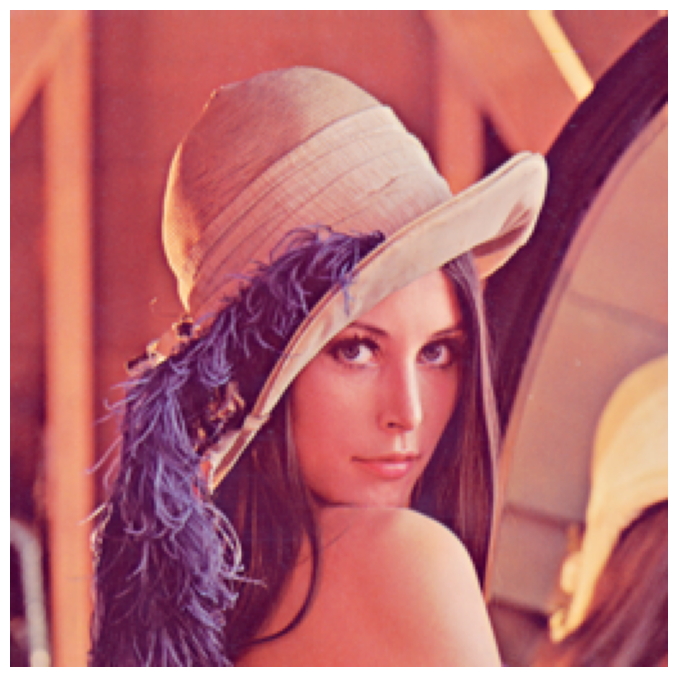

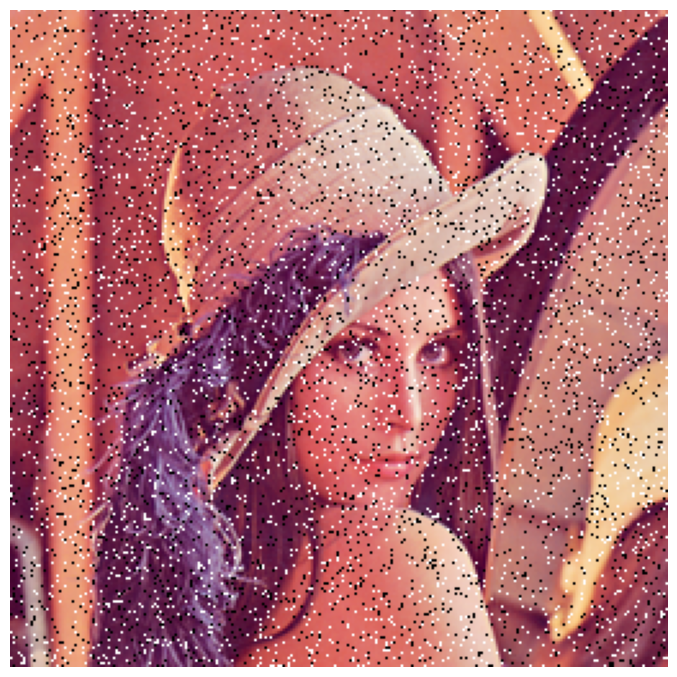

In [22]:
def imread(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
def plot_img(img, cmap='gray', title=''):
    plt.figure(figsize=(img.shape[0]/30,img.shape[1]/30))
    plt.imshow(img, cmap=cmap, vmin=0, vmax=255)
    plt.axis('off')
    plt.title(title)
    plt.show()

lena_rgb = imread('lenaRGB.png')
lena_szum = imread('lenaRGBSzum.png')

lena_rgb = lena_rgb.astype(float)
lena_szum = lena_szum.astype(float)

plot_img(lena_rgb / 255.0)
plot_img(lena_szum / 255.0)

In [23]:
import numpy as np

def median_filter_color(image, window_size):
    radius = window_size // 2
    result = np.copy(image)

    for y in range(radius, image.shape[0] - radius):
        for x in range(radius, image.shape[1] - radius):
            window = image[y - radius:y + radius + 1, x - radius:x + radius + 1, :]
            distances = np.empty((window_size, window_size))
            
            for rowWin in range(window_size):
                for colWin in range(window_size):
                    diff = window - window[rowWin, colWin]
                    distance = np.sqrt(np.sum(np.square(diff), axis=-1))
                    distances[rowWin, colWin] = distance.sum()
            
            min_index_flat = np.argmin(distances)
            min_index = np.unravel_index(min_index_flat, distances.shape)

            result[y, x] = window[min_index]

    return result

In [26]:
def median_filter_color_visualize(image):
    image = image  / 255.0
    window_size = 3
    filtered_image = median_filter_color(image, window_size)
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Noisy Image")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image)
    plt.title("Filtered Image")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

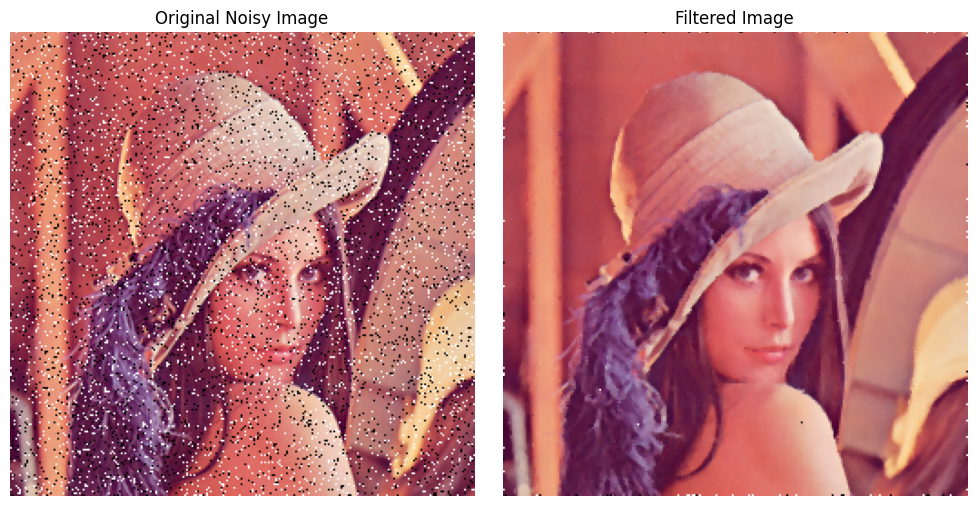

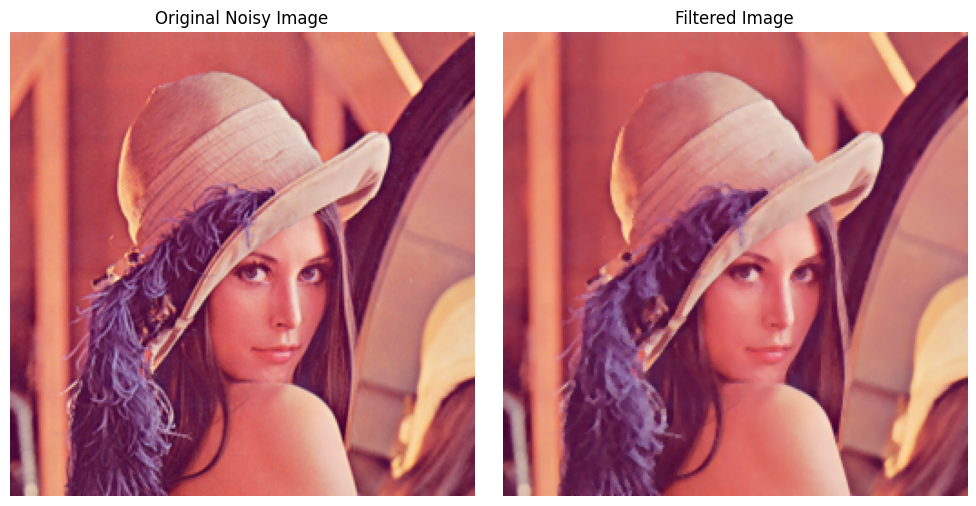

In [27]:
median_filter_color_visualize(lena_szum)
median_filter_color_visualize(lena_rgb)

In [73]:
# Po wykonaniu tego algorytmu widzimy, że w przypadku bardzo zaszumionego obrazu filtr skutecznie redukuję większość szumu, jednak nadal są widoczne
# niektóre artefakty, które nie pozwolają stwierdzić, że to działa idealnie. To zjawisko obserwujemy tutaj przy gradientach kolorystycznych.